### Nome: Larissa de Oliveira Penteado
### NUsp: 8941338

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import PIL

from mac0460_5832.utils import *

# MAC0460/5832 - Lista 1: Aprendizado de W-Operadores

### Data de Entrega: 23h55m do dia 05/05/2017


Q1. Encontre, utilizando a técnica de aprendizado de w-operadores vista em sala, o operador 1x3 (1 linha, 3 colunas) capaz de transformar a imagem src1 em dest1 (veja as variáveis abaixo) mostrando a tabela de padrões encontrada. Teste seu operador na imagem src1 e verifique que ele funciona como esperado. Teste seu operador nas imagens images/q1/1_test1.png e images/q1/1_test2.png desenhando as imagens obtidas (sugestão: use a função draw_img do arquivo mac0460_5832/utils.py).

In [2]:
"""Funcoes extraidas do github de Dennis José da Silva, de eps feitos para a materia Mac0470-Visao Computacional e
processamento de imagens"""

def read_image(filename):
    import PIL.Image
    return pil2array(PIL.Image.open(filename)) 

def pil2array(pil):
    w, h = pil.size
    shape = (h, w)
    image_dtype = np.uint8
    if pil.mode == '1':
        image_dtype = np.bool
    elif pil.mode == 'L':
        image_dtype = np.uint8
    elif pil.mode == 'I;16B':
        image_dtype = np.uint16
    elif pil.mode  in ('F', 'I'):
        image_dtype = np.uint32
    elif pil.mode == 'P':
        pil = pil.convert('RGB')
        shape = (h,w,3)
    elif pil.mode in ('RGB', 'YCbCr'):
        shape = (h,w,3)
        image_dtype = np.uint8
    elif pil.mode in ('RGBA', 'CMYK'):
        shape = (h,w,4)
        image_dtype = np.uint8
    else:
        raise TypeError("Invalid or unimplemented PIL image mode '%s'" % pil.mode)
    img = np.array(pil.getdata(), image_dtype).reshape(shape)
    if img.dtype == bool:
        return img
    return img > 127

def display_image(ima, width=None, height=None):
    from io import BytesIO
    import PIL.Image
    from IPython.display import display, Image

    im = PIL.Image.fromarray(np.uint8(ima))
    bio = BytesIO()
    im.save(bio, format='png')

    if width is None and height is None:
        display(Image(bio.getvalue(),  format='png'))
    elif width is None:
        display(Image(bio.getvalue(), height=height,  format='png'))
    elif height is None:
        display(Image(bio.getvalue(), width=width,  format='png'))
    else:
        display(Image(bio.getvalue(), width=width, height=height,  format='png'))

In [3]:
def insert_counter(key, counter, value):
    if not key in counter:
            counter[key] = [0, 0]
    counter[key][value] += 1
    
def check_counter(key, counter):
    if key in counter:
        return counter[key]
    else: return False

def get_value(i, j, img):
    H, W = np.shape(img)
    if i<0 or j<0 or i>=H or j>=W:
        return False
    else: return img[i][j]
    
def get_pattern(i, j, img, window, win_center):
    h, w = np.shape(window)
    i_cen = i - win_center[0]
    j_cen = j - win_center[1]
    pattern = []
    for k in range(h):
        for l in range(w):
            if window[k][l] == True:
                pattern.append(get_value(i_cen+k, j_cen+l,img))
    return tuple(pattern)

def get_result(counter):
    result = dict()
    for pattern in counter:
        if counter[pattern][0] >= counter[pattern][1]:
            result[pattern] = False
        else: result[pattern] = True
    return result

def learn_geral(in_image, out_image, window, center):
    counter = dict()
    for k in range(len(in_image)):
        image = in_image[k]
        H,W = np.shape(image)
        for i in range(H):
            for j in range(W):
                pattern = get_pattern(i, j, image, window, center)
                insert_counter(pattern, counter, out_image[k][i][j])
            
    return get_result(counter)

def apply_learn(result, image, window, center):
    H, W = np.shape(image)
    o_image = np.zeros((H,W), dtype=bool)
    for i in range(H):
        for j in range(W):
            a = get_pattern(i, j, image, window, center)
            o_image[i][j] = check_counter(a, result)
    return o_image

def apply_learnmult(result, image, window, center):
    n = len(result)
    H, W = np.shape(image)
    o_image = np.zeros((H,W), dtype=bool)
    for i in range(H):
        for j in range(W):
            found = False
            k = 0
            while k<n and not found:
                a = get_pattern(i, j, image, window[k], center[k])
                if a in result[k]:
                    o_image[i][j] = result[k][a]
                    found = True
                k+=1
    return o_image

def calculate_error(image_in, image_out):
    error = 0.0
    for i in range(np.shape(image_in)[0]):
        for j in range(np.shape(image_in)[1]):
            if (image_in[i][j]) != (image_out[i][j]):
                error+=1
    return error

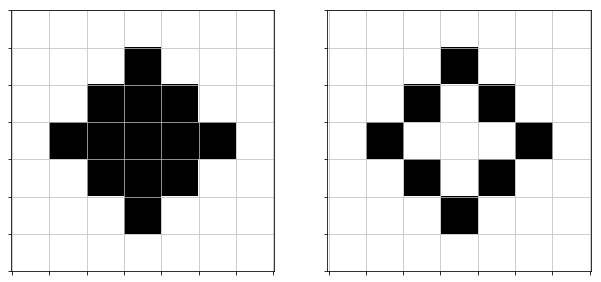

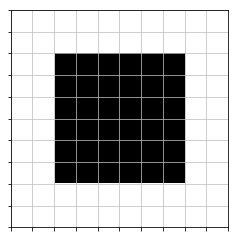

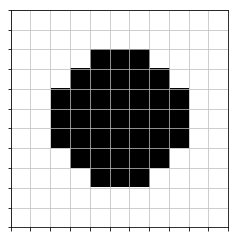

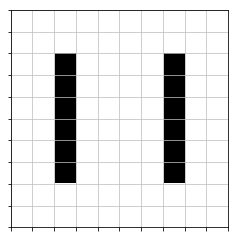

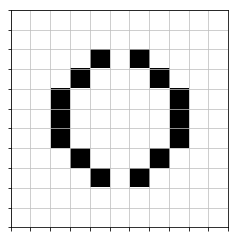

In [8]:
src1 = read_image('images/q1/1_src.png')
dest1 = read_image('images/q1/1_dest.png')

draw_img_pair(src1, dest1)

test1_1 = read_image('images/q1/1_test1.png')
test1_2 = read_image('images/q1/1_test2.png')
draw_img(test1_1)
draw_img(test1_2)
         
window1 = np.ones((1, 3), dtype=bool)   
center1 = (0, 1)
result1 = learn_geral([src1], [dest1], window1, center1)
image_test = apply_learn(result1, test1_1, window1, center1)
image_test2 = apply_learn(result1, test1_2, window1, center1)
draw_img(image_test)
draw_img(image_test2)

Q2. Aprenda o operador 3x3 para detecção de bordas. Treine seu operador nas imagens da pastas images/q2/ usando os pares (q2_src\*.png, q2_dest\*.png). Teste seu operador nas imagens images/q2/q2_test.png e images/q2/q2_test2.png. Algumas das imagens de treino são desenhadas abaixo.

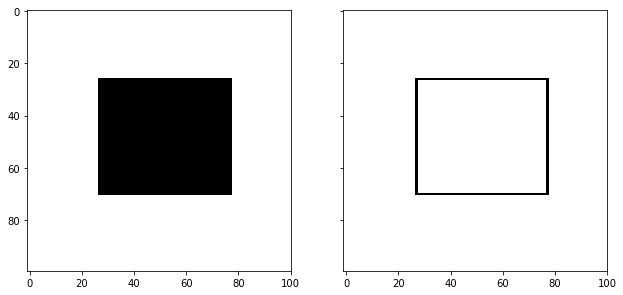

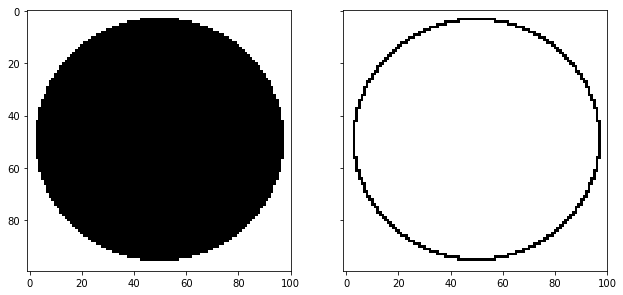

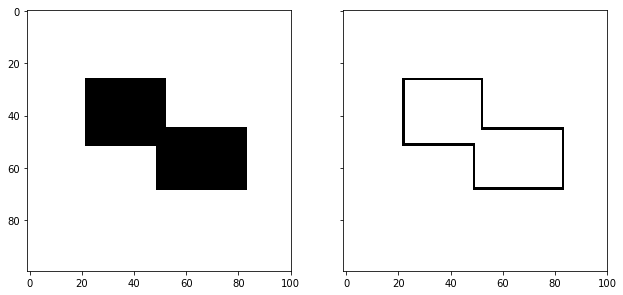

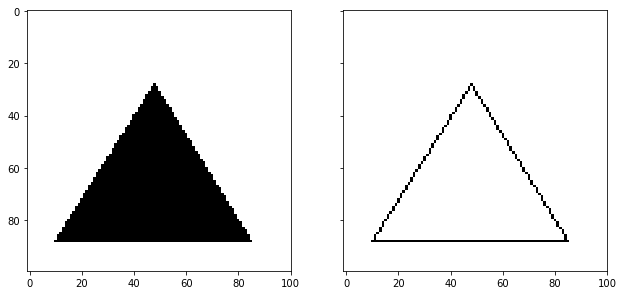

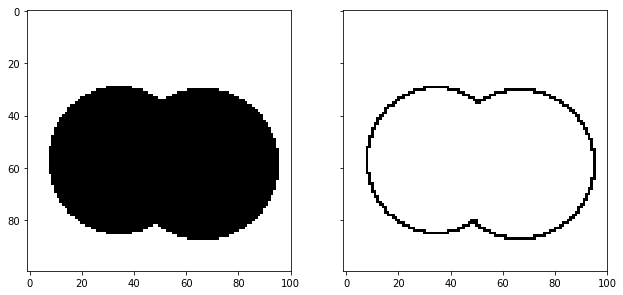

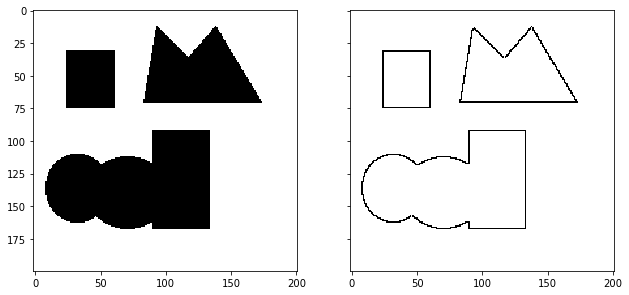

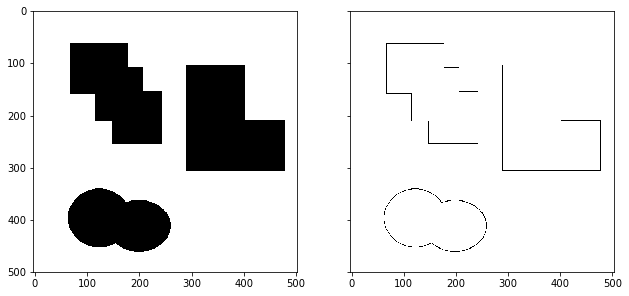

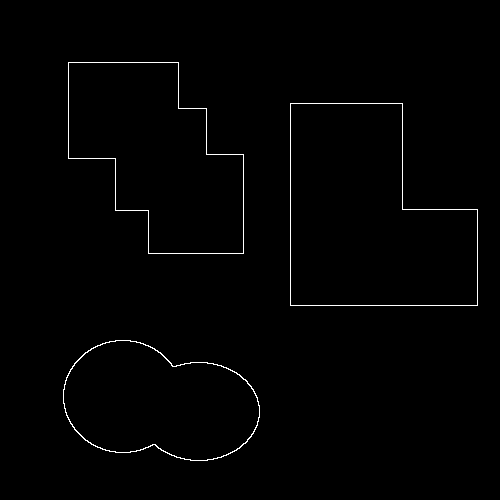

In [9]:
src2_1 = read_image('images/q2/q2_src1.png')
src2_2 = read_image('images/q2/q2_src2.png')
src2_3 = read_image('images/q2/q2_src3.png')
src2_4 = read_image('images/q2/q2_src4.png')
src2_5 = read_image('images/q2/q2_src5.png')


dest2_1 = read_image('images/q2/q2_dest1.png')
dest2_2 = read_image('images/q2/q2_dest2.png')
dest2_3 = read_image('images/q2/q2_dest3.png')
dest2_4 = read_image('images/q2/q2_dest4.png')
dest2_5 = read_image('images/q2/q2_dest5.png')

draw_img_pair(src2_1, dest2_1)
draw_img_pair(src2_2, dest2_2)
draw_img_pair(src2_3, dest2_3)
draw_img_pair(src2_4, dest2_4)
draw_img_pair(src2_5, dest2_5)

test2_1 = read_image('images/q2/q2_test.png')
test2_2 = read_image('images/q2/q2_test2.png')


in_image2 = [src2_1, src2_2, src2_3, src2_4, src2_5]
out_image2 = [dest2_1, dest2_2, dest2_3, dest2_4, dest2_5]
window2 = np.ones((3, 3), dtype=bool)
center2 = (1, 1)
result2 = learn_geral(in_image2, out_image2, window2, center2)
    

image_1 = apply_learn(result2, test2_1, window2, center2)
image_2 =  apply_learn(result2, test2_2, window2, center2)
draw_img_pair(test2_1, image_1)
draw_img_pair(test2_2, image_2)
display_image(image_2*255)
#imprimindo com outra funcao eh possivel ver que o operador conseguiu extrair as bordas da segunda imagem de teste
#corretamente

Q3. Use o algoritmo de aprendizado para obter um operador capaz de eliminar ruído. Use no treinamento as imagens images/q3/q3_src\*.png sempre com o mesmo target images/q3/q3_dest.png. Teste a janela com 5 elementos (cruz). Teste seu operador nas imagens images/q3/q3_test1.png e images/q3/q3_test2.png. Calcule e plote os erros $E_{in}$ e $E_{out}$ obtidos durante o treinamento.

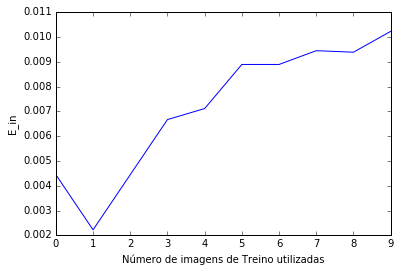

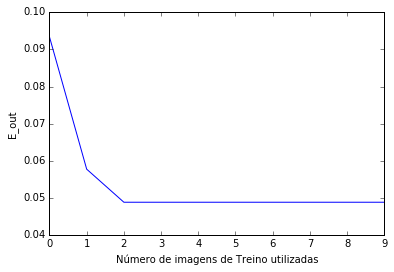

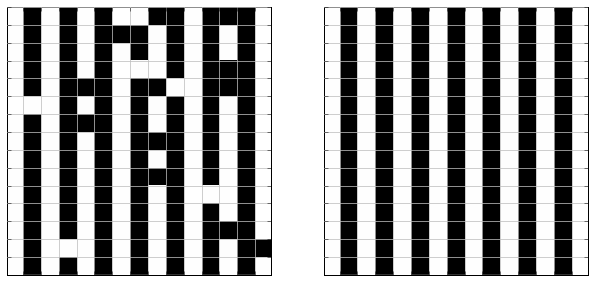

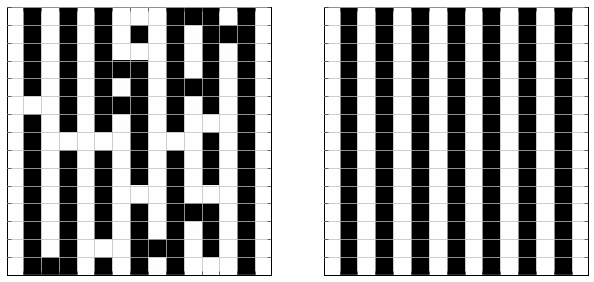

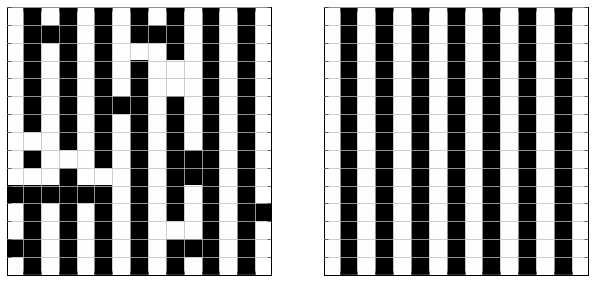

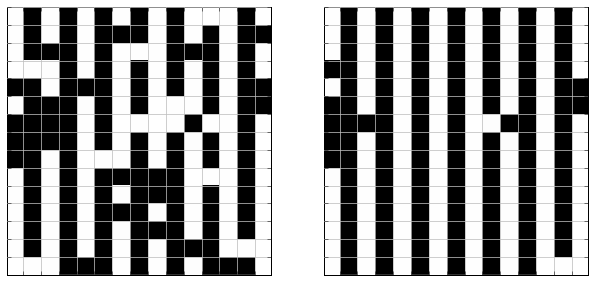

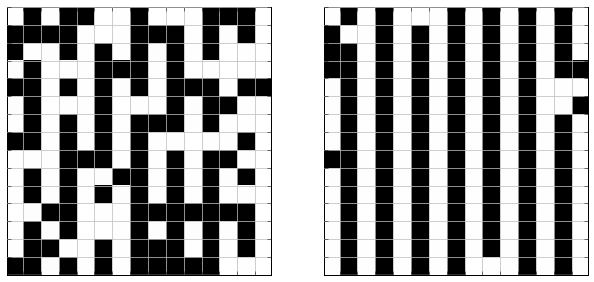

In [7]:
src3_1 = read_image('images/q3/q3_src1.png')
src3_2 = read_image('images/q3/q3_src2.png')
src3_3 = read_image('images/q3/q3_src3.png')
src3_4 = read_image('images/q3/q3_src4.png')
src3_5 = read_image('images/q3/q3_src5.png')
dest3 = read_image('images/q3/q3_dest.png')

in_image3 = []
for i in range(1,11):
    in_image3.append(read_image('images/q3/q3_src{}.png'.format(i)))
out_image3 = [dest3]*10
window3 = se_cross(1).astype('bool')
center3 = (1, 1)
H, W = np.shape(dest3)
test3_1 = read_image('images/q3/q3_test1.png')
test3_2 = read_image('images/q3/q3_test2.png')
inerror = []
outerror = []
for i in range(10):
    result3 = learn_geral(in_image3[:i+1], out_image3[:i+1], window3, center3)
    inerror1 = 0.0
    for j in range(i+1):
        image = apply_learn(result3, in_image3[j], window3, center3)
        inerror1 += calculate_error(image, dest3)
    inerror.append(inerror1/(H*W*(i+1)))
    test1 = apply_learn(result3, test3_1, window3, center3)
    test2 = apply_learn(result3, test3_2, window3, center3)
    outerror.append((calculate_error(test1, dest3) + calculate_error(test2, dest3))/(H*W*2.0))    

plt.plot(inerror)
plt.xlabel('Número de imagens de Treino utilizadas')
plt.ylabel('E_in')
plt.show()
plt.plot(outerror)
plt.xlabel('Número de imagens de Treino utilizadas')
plt.ylabel('E_out')
plt.show()

    
draw_img_pair(src3_1, dest3)
draw_img_pair(src3_2, dest3)
draw_img_pair(src3_3, dest3)

draw_img_pair(test3_1, test1)
draw_img_pair(test3_2, test2)


Q4. Projete um operador para aprender a extrair a letra 's' de imagens de texto. Para isso utilize os pares de imagens q4_src\*.png q4_dest\*.png da pasta images/q4/train. Teste seu operador nas imagens da pasta images/q4/test. Utilize a composição de janelas pequenas. Avalie o erro do seu operador comparando a saída obtida por ele com a saída esperada (imagens q4_gt\*.png da pasta images/q4/test).

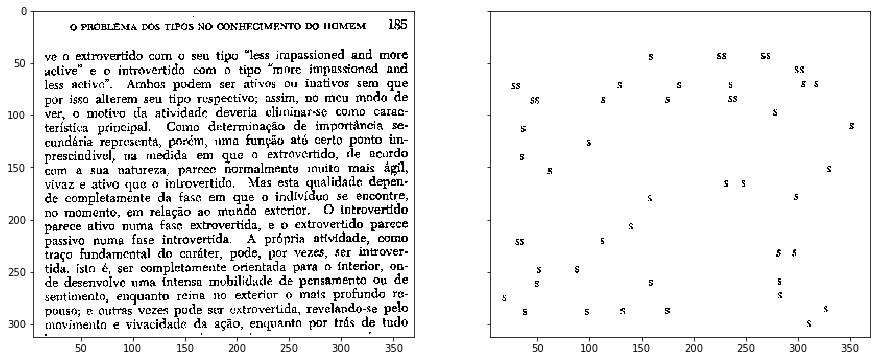

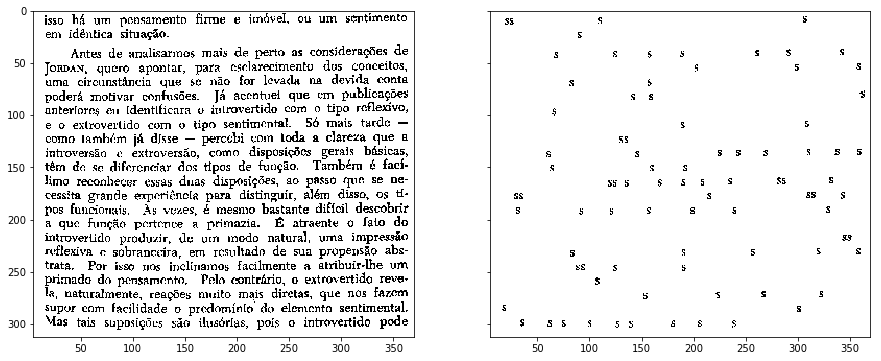

Erro: 0.005817252396166134


In [11]:
dest4_1a = read_image("images/q4/train/q4_dest1a.png")
src4_1a = read_image("images/q4/train/q4_src1a.png")
dest4_1b = read_image("images/q4/train/q4_dest1b.png")
src4_1b = read_image("images/q4/train/q4_src1b.png")
draw_img_pair(src4_1a, dest4_1a, figsz=(15, 6))
draw_img_pair(src4_1b, dest4_1b, figsz=(15, 6))

in_image4a = []
in_image4b = []
out_image4a = []
out_image4b = []
tests = []
exp_results = []
window4= np.ones((5, 5), dtype=bool)
center4 = (2, 2)
for i in range(1,11,2):
    in_image4a.append(read_image('images/q4/train/q4_src{}a.png'.format(i)))
    in_image4b.append(read_image('images/q4/train/q4_src{}b.png'.format(i)))
    out_image4a.append(read_image('images/q4/train/q4_dest{}a.png'.format(i)))
    out_image4b.append(read_image('images/q4/train/q4_dest{}b.png'.format(i)))

    
for i in range(2, 11, 2):
    tests.append(read_image('images/q4/test/q4_test{}a.png'.format(i)))
    tests.append(read_image('images/q4/test/q4_test{}b.png'.format(i)))
    exp_results.append(read_image('images/q4/test/q4_gt{}a.png'.format(i)))
    exp_results.append(read_image('images/q4/test/q4_gt{}b.png'.format(i)))

result4a = learn_geral(in_image4a, out_image4a, window4, center4)

for i in range(len(in_image4b)):
    in_image4b[i] = apply_learn(result4a, in_image4b[i], window4, center4)
    
result4b = learn_geral(in_image4b, out_image4b, window4, center4)
error4 = 0.0
for i in range(len(tests)):
    tests[i] = apply_learn(result4a, tests[i], window4, center4)
    tests[i] = apply_learn(result4b, tests[i], window4, center4)
    error4 += calculate_error(tests[i], exp_results[i])

H, W = np.shape(tests[0])
error4 = error4/(H*W*len(tests))
print("Erro:", error4)


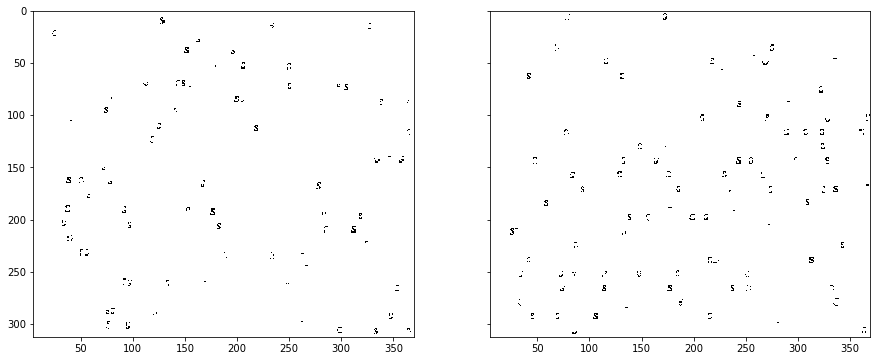

In [12]:
draw_img_pair(tests[3], tests[4], figsz=(15, 6))

Q5. Utilizando a técnica de multiresolução, aprenda o operador capaz de remover ruído das imagens da pasta images/q5/. Utilize os pares de imagens (q5_src\*.png, q5_dest.png) para o treinamento e depois teste seu  operador nas imagens q5_test1.png e q5_test2.png.

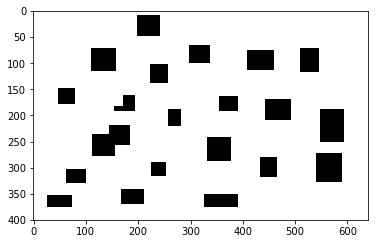

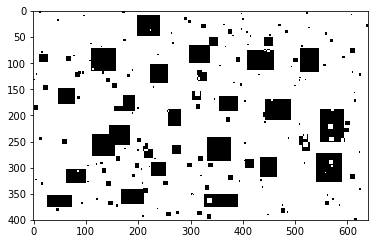

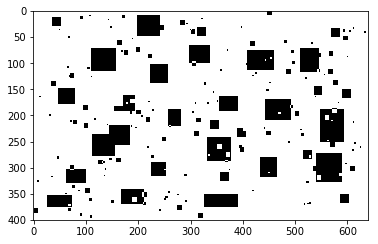

In [ ]:
dest5 = read_image("images/q5/q5_dest.png")
src5_1 = read_image("images/q5/q5_src1.png")
src5_2 = read_image("images/q5/q5_src2.png")
draw_img(dest5)
draw_img(src5_1)
draw_img(src5_2)

in_image5 = []
tests5 = []
for i in range(1,11):
    in_image5.append(read_image('images/q5/q5_src{}.png'.format(i)))
out_image5 = [read_image('images/q5/q5_dest.png')]*10
for i in range(1,4):
    tests5.append(read_image('images/q5/q5_test{}.png'.format(i)))

In [ ]:
window5a = np.ones((5, 5), dtype=bool)
center5 = (2, 2)
window5b = np.zeros((5, 5), dtype=bool)
window5b[::2, ::2] = True
window5c = [[True]]

result5a = learn_geral(in_image5, out_image5, window5a, center5)
result5b = learn_geral(in_image5, out_image5, window5b, center5)
result5c = learn_geral(in_image5, out_image5, window5c, (0,0))


In [ ]:
results5 = [result5a, result5b, result5c]
windows = [window5a, window5b, window5c]
centers = [center5, center5, (0,0)]
resp5 = []
for i in range(len(tests5)):
    resp5.append(apply_learnmult(results5, tests5[i], windows, centers))


In [ ]:
error51 = 0
for i in range(len(tests5)):
    draw_img(resp5[i])
    error51 += calculate_error(resp5[i], dest5)
    
H,W = np.shape(tests5[i])
error51 = error51/(len(tests5)*H*W)
print('Error: ',error51)

### Utilizando janela 5x5, 3x3, mas transformando a 5x5 em 3x3 e uma janela 1x1

In [ ]:
window5d = np.ones((3, 3), dtype='bool')
center5d = (1, 1)
result5d = learn_geral(in_image5, out_image5, window5d, center5d)

results51 = [result5a, result5d, result5c]
#window5b transforma 5x5 em 3x3
windows = [window5a, window5b, window5c]
centers = [center5, center5, (0,0)]
resp5a = []
for i in range(len(tests5)):
    resp5a.append(apply_learnmult(results51, tests5[i], windows, centers))

In [ ]:
error52 = 0
for i in range(len(tests5)):
    draw_img(resp5a[i])
    error52+=calculate_error(resp5a[i], dest5)
error52 = error52/(len(tests5[i])*H*W)
print("Erro: ",error52)

Q6. Utilize a técnica de envelope, como visto em sala, para remover ruído de imagens. Use o mesmo dataset da questão anterior e as funções de morfologia disponíveis em mac0460_5832/utils.py para definir as funções $\alpha$ e $\beta$. Um exemplo de erosão em uma das imagens de treino é mostrado abaixo. Comente sobre a escolha das funções $\alpha$ e $\beta$.

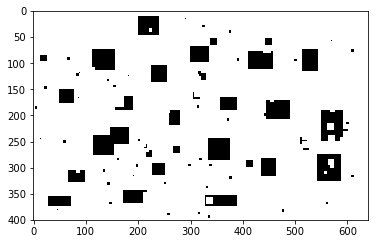

In [14]:
src6_1 = read_image("images/q5/q5_src1.png")
draw_img(erosion(src6_1, se_box(2)))

window6 = np.ones((5, 5), dtype=bool)
center6 = (2,2)
result6 = learn_geral(in_image5, out_image5, window6, center6)
results6 = []
for i in range(len(tests5)):
    results6.append(apply_learn(result6, tests5[i], window6, center6))


1. utilizando alfa como opening ajuda a remover ruídos pequenos, já o closing fecha buracos. O tamanho dos ruídos removidos e furacos preenchidos depende das dimensões dos elementos estruturantes utilizados. opening e closing pouco interferem nos quadrados e retângulos maiores, por isso são bons alfas e betas.

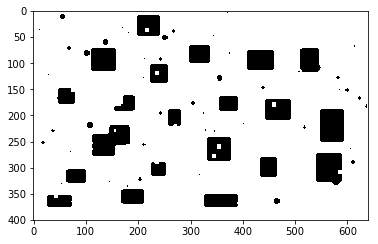

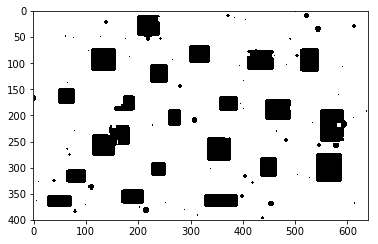

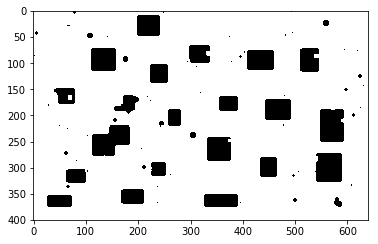

In [15]:
alpha6a = opening
beta6a = closing
resp6_enva = []
for i in range(len(results6)):
    resp6_enva.append((results6[i] | alpha6a(results6[i], window6))& beta6a(results6[i], window6))
    draw_img(resp6_enva[i])

Utilizando erosão e dilatação também removem ruídos e fecham buracos, respectivamente. Porém, essas funções morfológicas interferem nos retângulas maiores da imagem que queremos manter 'preservados'.

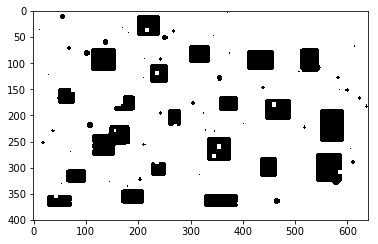

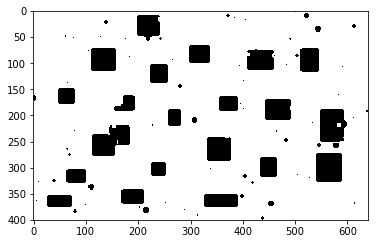

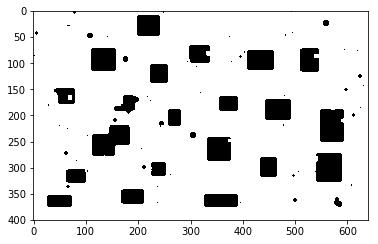

In [16]:
alpha6b = erosion
beta6b = dilation
resp6_envb = []
for i in range(len(results6)):
    resp6_envb.append((results6[i] | alpha6b(results6[i], window6))& beta6b(results6[i], window6))
    draw_img(resp6_envb[i])

Utilizando um elemento estruturante maior.

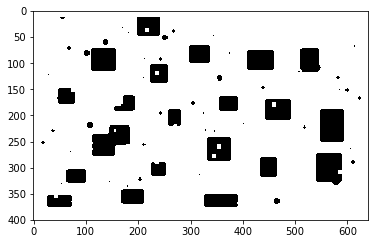

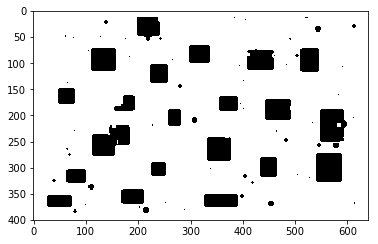

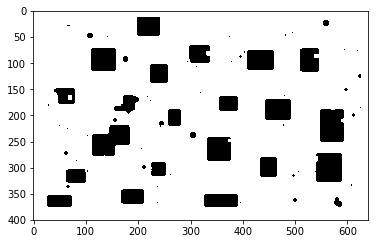

In [17]:
alpha6c = opening
beta6c = closing
window6c = se_box(13).astype('bool')
resp6_envc = []
for i in range(len(results6)):
    resp6_envc.append((results6[i] | alpha6c(results6[i], window6c)) & beta6c(results6[i], window6c))
    draw_img(resp6_envc[i])

Q7. Utilize a técnica de envelope com multiresolução para aprender um operador capaz de remover ruído de imagens. Para cada uma das janelas, defina funções $\alpha$ e $\beta$ (podem ser diferentes). Compare o resultado obtido aplicando a mistura de técnicas com os resultados das duas questões anteriores.

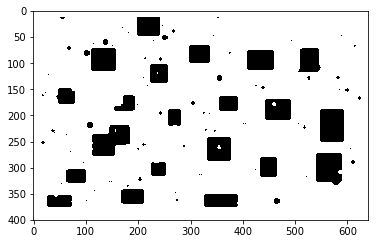

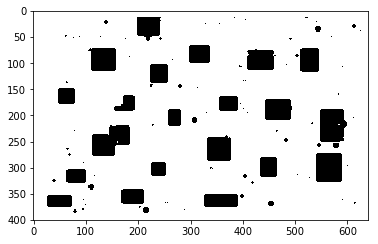

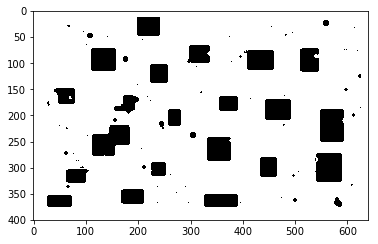

In [18]:
results7a = []
alpha7a = opening
beta7a = closing
for i in range(len(resp5)):
    results7a.append((resp5[i] | alpha7a(resp5[i], window6c))& beta6a(resp5[i], window6c))
    draw_img(results7a[i])

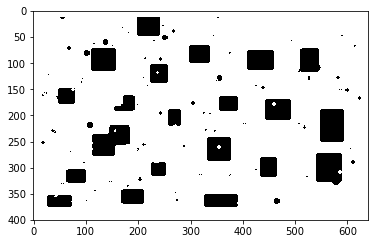

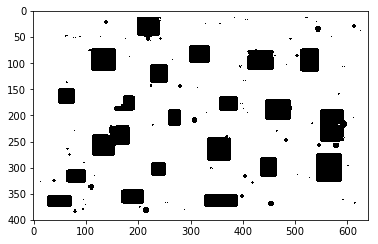

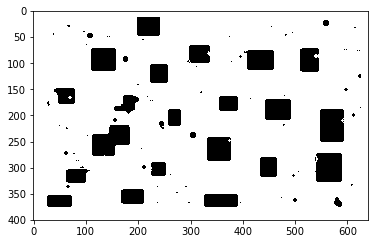

In [19]:
results7b = []
for i in range(len(resp5a)):
    results7b.append((resp5a[i] | alpha7a(resp5a[i], window6c))& beta6a(resp5a[i], window6c))
    draw_img(results7b[i])

Q8. A função gen_rand_imgs abaixo retorna um par de imagens. A primeira contém alguns pontos gerados aleatoriamente. A segunda é a dilatação da primeira por um elemento estruturante em forma de cruz. Aprenda o operador capaz de realizar essa transformação, gerando os pares de src e dest. Crie os dados de treinamento baseado na equação vista em sala ($m(\epsilon, \delta, H) = \frac{1}{\epsilon}ln\frac{|H|}{\delta}$). Compare o resultado obtido pelo seu classificador (gere mais pares para teste e ter uma estimativa de $E_{out}$) para $\epsilon = [0.2, 0.1]$ e $\delta = [0.3, 0.2]$.

O m da fórmula refere-se ao número de samples, ou pares (x, y), que precisamos considerar durante o treinamento do operador que queremos aprender. Assim, nessa questão, só treinamos o operador até o número de pixels da imagem que são necessários de acordo com a fórmula acima.

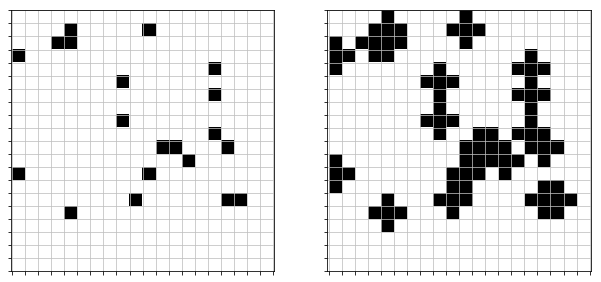

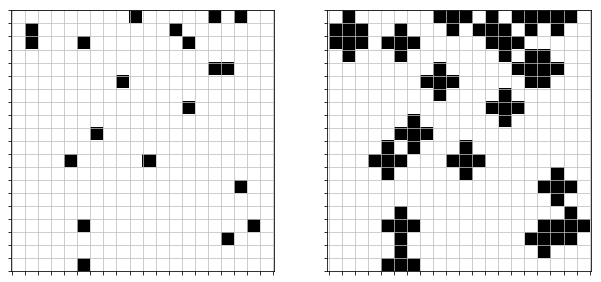

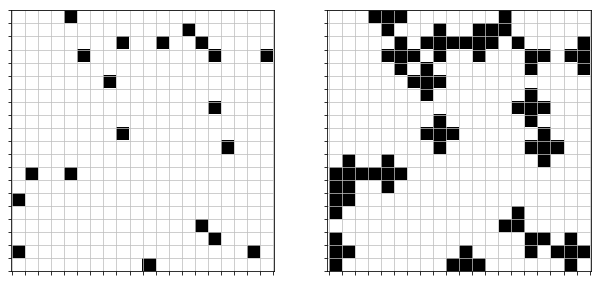

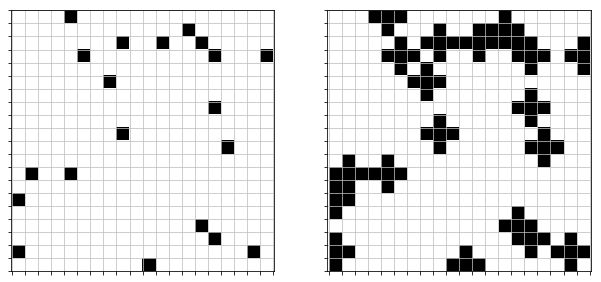

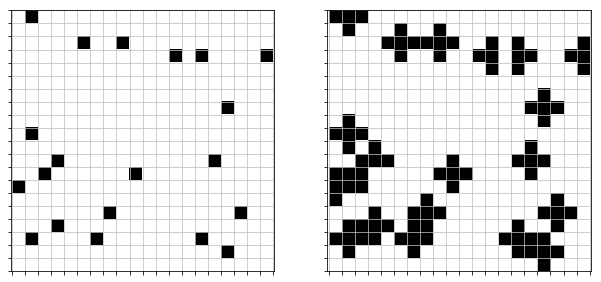

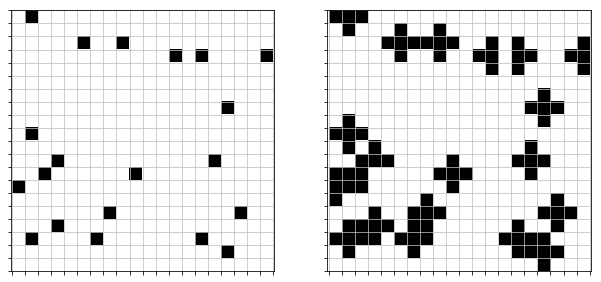

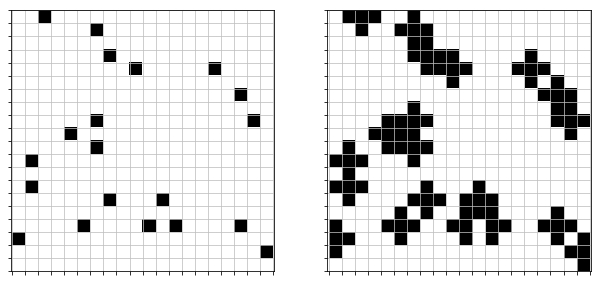

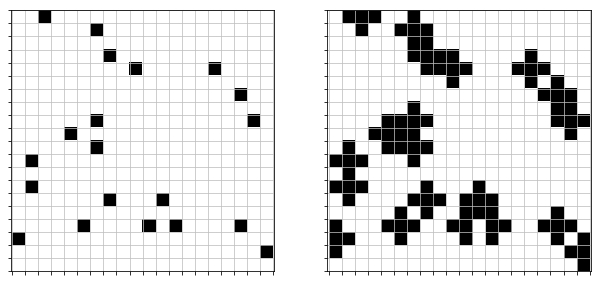

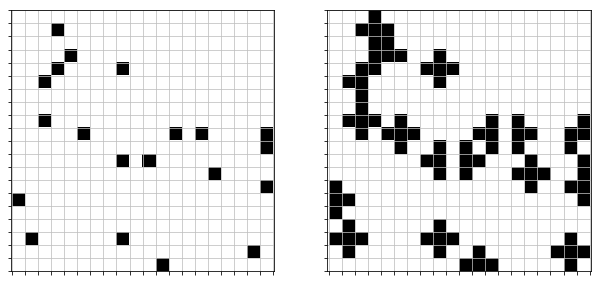

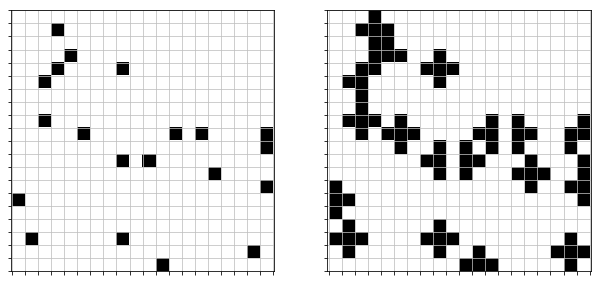

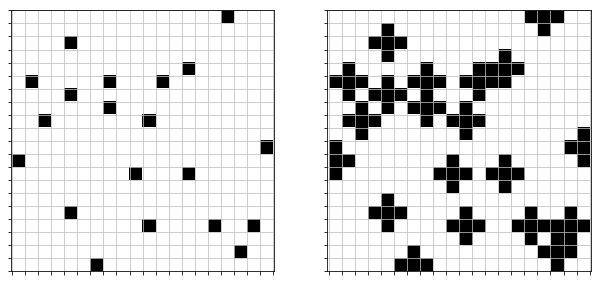

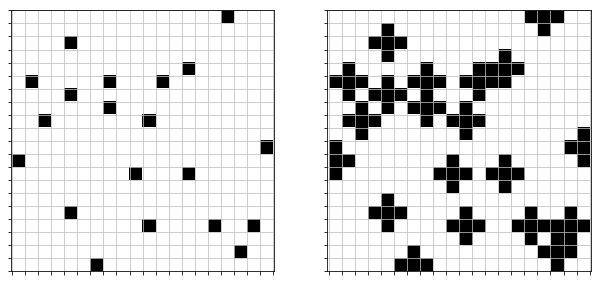

erro1: 0.007
erro2: 0.004


In [20]:
def gen_rand_imgs():
    noise = np.zeros((20, 20)).astype(bool)
    num_pixels = 20
    x = np.random.randint(0, 20, num_pixels)
    y = np.random.randint(0, 20, num_pixels)

    for i in range(num_pixels):
        noise[x[i], y[i]] = 1

    return noise, dilation(noise, se_cross(1))

src5_1, dest5_1 = gen_rand_imgs()
src5_2, dest5_2 = gen_rand_imgs()
draw_img_pair(src5_1, dest5_1)
draw_img_pair(src5_2, dest5_2)

window8 = se_cross(1).astype('bool')
center8 = (1,1)
epsilon = [0.2, 0.1]
delta = [0.3, 0.2]

#tamanho do espaco de hipotese: 2^|w|, onde |w| eh 2^(o tamanho da janela)
m1 = int(np.ceil(1/epsilon[0]*np.log(2**32/delta[0])))
m2 = int(np.ceil(1/epsilon[1]*np.log(2**32/delta[1])))

tests8 = []
exp_re8 = []
for i in range(5):
    im, im2 = gen_rand_imgs()
    tests8.append(im)
    exp_re8.append(im2)

counter1 = dict()
counter2 = dict()
sum0 = 0
in_image = [src5_1, src5_2]
out_image = [dest5_1, dest5_2]
for k in range(len(in_image)):
    image = in_image[k]
    H,W = np.shape(image)
    for i in range(H):
        for j in range(W):
            pattern = get_pattern(i, j, image, window8, center8)
            if sum0 < m1:
                insert_counter(pattern, counter1, out_image[k][i][j])
            if sum0 < m2:
                insert_counter(pattern, counter2, out_image[k][i][j])
            sum0 +=1
            
counter_res1 = get_result(counter1)
counter_res2 = get_result(counter2)
resp8a = []
resp8b = []
error_out8a = 0.0
error_out8b = 0.0
for i in range(len(tests8)):
    resp8a.append(apply_learn(counter_res1, tests8[i], window8, center8))
    resp8b.append(apply_learn(counter_res2, tests8[i], window8, center8))
    draw_img_pair(tests8[i], resp8a[i])
    draw_img_pair(tests8[i], resp8b[i])
    error_out8a += calculate_error(resp8a[i], exp_re8[i])
    error_out8b += calculate_error(resp8b[i], exp_re8[i])

H, W = np.shape(tests8[0])
n = len(tests8)
error_out8a = error_out8a/(n*W*H)
error_out8b = error_out8b/(n*W*H)
print('erro1:', error_out8a)
print('erro2:', error_out8b)